In [41]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords = set(stopwords_list.decode().splitlines()) 
import os


# Aula 17: Classificação de Textos com Redes Neurais
**Objetivo: ao fim desta aula, o aluno será capaz de programar, treinar e interpretar uma rede neural para classificação de textos usando Keras**


In [42]:
df = pd.read_csv('./datasets/IMDB Dataset.csv')
vectorizer = CountVectorizer(binary=True, stop_words=stopwords, max_features=1000, max_df=0.4)
X = vectorizer.fit_transform(list(df['review'])).toarray()
print(X.shape)

/home/user/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


(50000, 1000)


# Exercício 1
*Objetivo: analisar um código e suas saídas para entender o que é one-hot encoding*

Uma das maneiras de codificar uma saída é através do processo one-hot encoding. Analise o código abaixo e responda:

1. Como funciona o "one-hot encoding"?
1. O que significa cada linha da matriz de one-hot encodings?
1. O que significa cada coluna da matriz de one-hot encodings?



In [43]:
from sklearn.preprocessing import OneHotEncoder
labels = np.array([list(df['sentiment'])]).T
ohe = OneHotEncoder()
y = ohe.fit_transform(labels).toarray()
print(type(y))
print(y.shape)
print(labels[0:5,:])
print(y[0:5,:])


<class 'numpy.ndarray'>
(50000, 2)
[['positive']
 ['positive']
 ['positive']
 ['negative']
 ['positive']]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


# Exercício 2
*Objetivo: relacionar a teoria de redes neurais a sua implementação para classificação de textos*

A primeira rede neural que implementaremos tem uma entrada X, na mesma forma que estávamos usando no sklearn. A rede neural implementa a equação:

$$
y=\sigma(XW)
$$

Onde:
* $y$ é a saída,
* $X$ é a entrada,
* $W$ é uma matriz
* $\sigma( . )$ é uma função sigmoide

A ideia da rede é ter tantas saídas quantas são as possíveis classes em nossos dados. A saída deve ser igual a 1 para a classe “correta”, e 0 para todas as outras classes.

1. No caso do IMDB dataset, quantas saídas devemos ter em nossa rede?
1. No código abaixo, existe a função `rede_neural_simples`. Ela define um modelo de rede neural. Encontre onde definimos a existência da função sigmoide, e onde definimos que existirá a multiplicação matricial $XW$.
1. Lembrando que $X$ é a matriz que marca a presença de uma palavra em cada documento, o que significam as dimensões de W?
1. Mais adiante, fazemos o plot da rede. O que significa cada campo desse plot?
1. O que a função que define a rede neural retorna? A rede neural executa assim que a função é chamada?



In [44]:
from keras.models import Model
from keras.layers import Input, Dense

In [45]:
def rede_neural_simples(input_dims, n_dims_out):
  input_layer = Input(shape=(input_dims,))
  x = input_layer
  y = Dense(n_dims_out, activation='sigmoid', name='classificador')(x)
  return Model(input_layer, y)

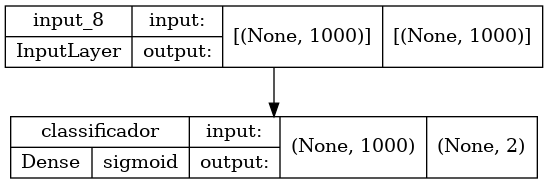

In [46]:
from tensorflow.keras.utils import plot_model

rede_neural = rede_neural_simples(X.shape[1], y.shape[1])
rede_neural.compile(optimizer='adam', loss='mse')
plot_model(rede_neural, show_shapes=True, show_layer_activations=True)

# Exercício 3
*Objetivo: treinar uma rede neural simples e analisar as curvas de loss*

Execute o processo de treino (fit) da rede neural simples.

1. O que é Early Stopping? Por que ele é relevante?
1. O que significa dizer que a métrica de erro é `mse` (mean squared error)?
1. O que significa dizer que o otimizador é `adam` (adaptive momentum)?
1. O que significa o parâmetro `validation_split`?
1. O que significa o parâmetro `patience`?
1. Como as curvas de `loss` e `val_loss` se comportam? O que isso significa?

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 1000) (10000, 1000) (40000, 2) (10000, 2)


In [48]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
history = rede_neural.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=es)

Epoch 1/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1648 - val_loss: 0.1294
Epoch 2/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1197 - val_loss: 0.1142
Epoch 3/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1095 - val_loss: 0.1085
Epoch 4/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1049 - val_loss: 0.1059
Epoch 5/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1023 - val_loss: 0.1047
Epoch 6/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1007 - val_loss: 0.1038
Epoch 7/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0996 - val_loss: 0.1034
Epoch 8/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0988 - val_loss: 0.1032
Epoch 9/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0982 - val_loss: 0.1033
Epoch 10/500
1000/1000 [==============================] - 3s 3ms/step - l

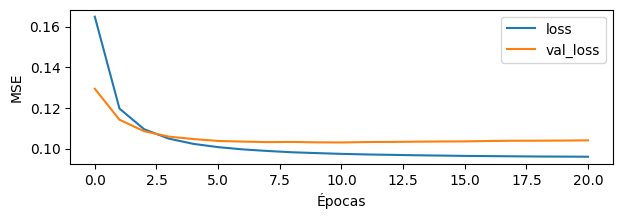

In [49]:
plt.figure(figsize=(7,2))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Exercício 4
*Objetivo: analisar o desempenho da rede neural*

Analise o código abaixo, para avaliação da rede neural

1. Por que precisamos usar o método `ohe.inverse_transform()` nas saídas da rede neural para usar o `classification_report`?
1. Como o desempenho da rede neural se compara com o desempenho das outras estratégias de classificação que já usamos nesta disciplina?



In [50]:
y_est = rede_neural.predict(X_test)
print(y_est[0:5,:])
print(y_test[0:5,:])

[[0.9663729  0.03464147]
 [0.9813424  0.01898157]
 [0.9917686  0.00821775]
 [0.8646766  0.13400517]
 [0.9913141  0.0086036 ]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(ohe.inverse_transform(y_test), ohe.inverse_transform(y_est)))

              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4986
    positive       0.84      0.86      0.85      5014

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Exercício 5
*Objetivo: analisar os pesos da rede neural*

Voltando à equação da rede neural:

$$
y=\sigma(XW)
$$

1. Quantas linhas e colunas deve ter a matriz W?
1. O que significa cada elemento $w_{i,j}$?
1. Como poderíamos usar a matriz W para entender o quanto cada palavra foi relevante em nosso processo de classificação?
1. Verifique o código da seção “que palavras têm mais peso?”. Ele implementa uma ideia parecida com a que você propôs?
1. Verifique as palavras que foram encontradas como mais relevantes para a classificação. Esse resultado concorda com o que tivemos para os classificadores anteriores?



In [52]:
w = rede_neural.get_layer('classificador').get_weights()
print(w)
print(w[0])

[array([[-0.22114658,  0.21878812],
       [-0.25027734,  0.2382956 ],
       [ 0.17826658, -0.17351529],
       ...,
       [-0.28244954,  0.28698665],
       [-0.21011603,  0.21150614],
       [-0.00211613,  0.00580981]], dtype=float32), array([ 0.00420535, -0.00414795], dtype=float32)]
[[-0.22114658  0.21878812]
 [-0.25027734  0.2382956 ]
 [ 0.17826658 -0.17351529]
 ...
 [-0.28244954  0.28698665]
 [-0.21011603  0.21150614]
 [-0.00211613  0.00580981]]


/home/user/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


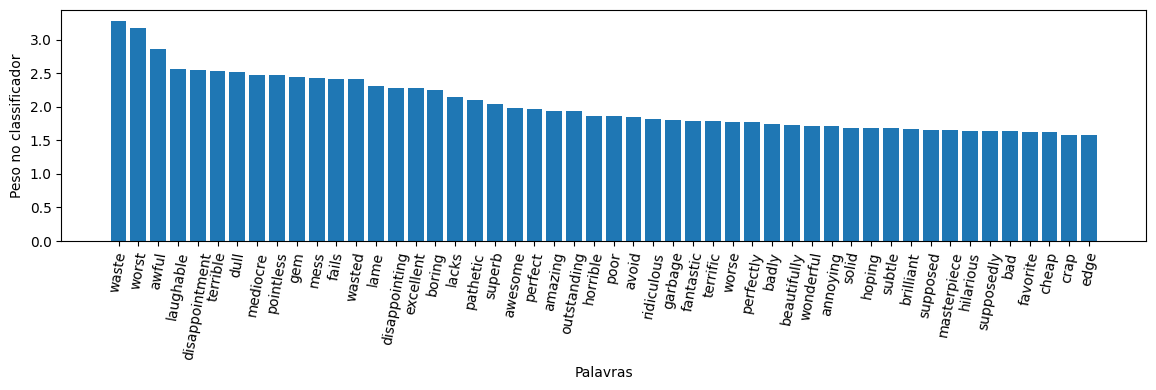

In [53]:
# Visualização 1: quais são as palavras de maior peso?
pesos = np.abs(w[0][:,0] - w[0][:,1])
feature_names = vectorizer.get_feature_names() # Modificar isso para versões mais atuais do sklearn
pares = [ (pesos[i], feature_names[i]) for i in range(len(feature_names))]
pares = sorted(pares, reverse=True)
pesos_ = [c[0] for c in pares]
palavras_ = [c[1] for c in pares]

n_palavras = 50
plt.figure(figsize=(14,3))
plt.bar(np.arange(n_palavras), pesos_[0:n_palavras])
plt.xticks(np.arange(n_palavras), palavras_[0:n_palavras], rotation=80)
plt.xlabel('Palavras')
plt.ylabel('Peso no classificador')
plt.show()

# Exercício 6
*Objetivo: entender como realizar uma projeção intermediária*

Analise o código abaixo, da função `rede_neural_proj`. Ele implementa uma rede neural um pouco diferente da anterior.

1. Qual é essa diferença?
1. Como ela poderia ser escrita matematicamente (complementando a equação do caso anterior)?
1. Houve diferença no desempenho da rede ao adicionar a nova camada?

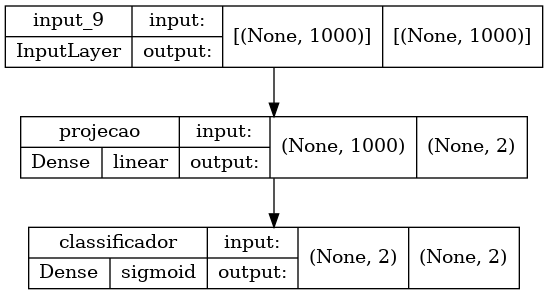

In [54]:
def rede_neural_proj(input_dims, n_dims_out):
  input_layer = Input(shape=(input_dims,))
  x = input_layer
  x = Dense(2, name='projecao')(x)
  y = Dense(n_dims_out, activation='sigmoid', name='classificador')(x)
  return Model(input_layer, y)

rede_neural = rede_neural_proj(X.shape[1], y.shape[1])
rede_neural.compile(optimizer='adam', loss='mse')
plot_model(rede_neural, show_shapes=True, show_layer_activations=True)

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
history = rede_neural.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=es)

Epoch 1/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1853 - val_loss: 0.1193
Epoch 2/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1084 - val_loss: 0.1050
Epoch 3/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1011 - val_loss: 0.1040
Epoch 4/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0994 - val_loss: 0.1036
Epoch 5/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0987 - val_loss: 0.1038
Epoch 6/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0983 - val_loss: 0.1043
Epoch 7/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0981 - val_loss: 0.1045
Epoch 8/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0979 - val_loss: 0.1048
Epoch 9/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0978 - val_loss: 0.1049
Epoch 10/500
1000/1000 [==============================] - 4s 4ms/step - l

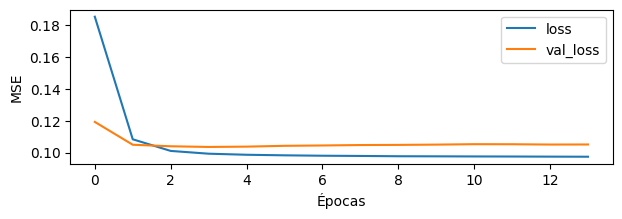

In [56]:
plt.figure(figsize=(7,2))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [57]:
y_est = rede_neural.predict(X_test)
print(classification_report(ohe.inverse_transform(y_test), ohe.inverse_transform(y_est)))

              precision    recall  f1-score   support

    negative       0.86      0.83      0.85      4986
    positive       0.84      0.86      0.85      5014

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Exercício 7
*Objetivo: interpretar o espaço latente gerado por uma rede neural com uma camada oculta*

1. Quais são as dimensões da matriz da camada `projeção` de nossa rede neural? O que ela está projetando?
1. O que você esperaria ver nesse espaço vetorial interno da rede – também chamado de `espaço latente`?
1. Analise o código que mostra as projeções intermediárias da rede neural. O que ele mostra? Como devemos interpretá-lo?



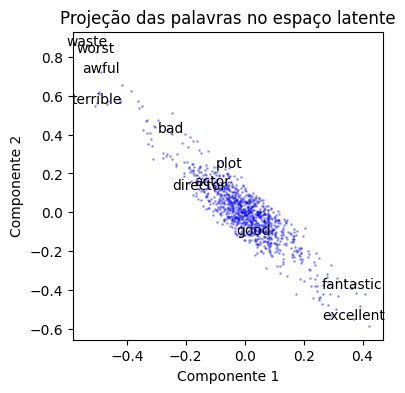

In [58]:
# Visualização 2: onde foi parar cada palavra?
v = rede_neural.get_layer('projecao').get_weights()[0]
plt.figure(figsize=(4,4))
plt.scatter(v[:,0], v[:,1], s=1, alpha=0.3, c='b')
for s in ["director", "actor", "bad", "good", "excellent", "plot", "worst", "terrible", "waste", "awful", "fantastic"]:
    _n = vectorizer.vocabulary_[s]
    plt.text(v[_n,0], v[_n,1], s, ha='center')
plt.title('Projeção das palavras no espaço latente')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
#plt.xlim([-20,20])
#plt.ylim([-20,20])
plt.show()

# Exercício 8
*Objetivo: analisar o espaço latente quando aumentamos o tamanho da dimensão latente da rede neural*

Se a dimensão do espaço latente da rede neural for maior que dois, é necessário usar alguma técnica de redução de dimensionalidade, como `PCA`, para visualizá-la.

O que acontece com as palavras no espaço latente e com o desempenho da rede quando aumentamos a dimensão do espaço latente?

In [68]:
def rede_neural_proj(input_dims, n_dims_out):
  input_layer = Input(shape=(input_dims,))
  x = input_layer
  x = Dense(1000, name='projecao')(x)
  y = Dense(n_dims_out, activation='sigmoid', name='classificador')(x)
  return Model(input_layer, y)

rede_neural = rede_neural_proj(X.shape[1], y.shape[1])
rede_neural.compile(optimizer='adam', loss='mse')
plot_model(rede_neural, show_shapes=True, show_layer_activations=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
history = rede_neural.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=es)
y_est = rede_neural.predict(X_test)
print(classification_report(ohe.inverse_transform(y_test), ohe.inverse_transform(y_est)))

Epoch 1/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1200 - val_loss: 0.1086
Epoch 2/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1073 - val_loss: 0.1089
Epoch 3/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1054 - val_loss: 0.1067
Epoch 4/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1044 - val_loss: 0.1056
Epoch 5/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1038 - val_loss: 0.1078
Epoch 6/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1031 - val_loss: 0.1079
Epoch 7/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1029 - val_loss: 0.1058
Epoch 8/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1024 - val_loss: 0.1075
Epoch 9/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1021 - val_loss: 0.1083
Epoch 10/500
1000/1000 [==============================] - 4s 4ms/step - l

In [69]:
v = rede_neural.get_layer('projecao').get_weights()[0]
v.shape
pca = PCA(2)
v = pca.fit_transform(v)

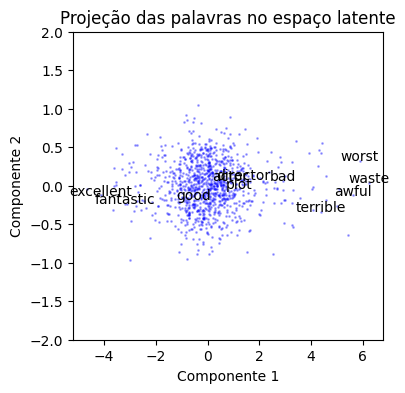

In [71]:
# Visualização 2: onde foi parar cada palavra?
plt.figure(figsize=(4,4))
plt.scatter(v[:,0], v[:,1], s=1, alpha=0.3, c='b')
for s in ["director", "actor", "bad", "good", "excellent", "plot", "worst", "terrible", "waste", "awful", "fantastic"]:
    _n = vectorizer.vocabulary_[s]
    plt.text(v[_n,0], v[_n,1], s, ha='center')
plt.title('Projeção das palavras no espaço latente')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
# plt.xlim([-4,4])
plt.ylim([-2,2])
plt.show()

Epoch 1/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1676 - val_loss: 0.1487
Epoch 2/500
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1493 - val_loss: 0.1470
Epoch 3/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1472 - val_loss: 0.1503
Epoch 4/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1464 - val_loss: 0.1489
Epoch 5/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1457 - val_loss: 0.1431
Epoch 6/500
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1453 - val_loss: 0.1424
Epoch 7/500
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1447 - val_loss: 0.1427
Epoch 8/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1446 - val_loss: 0.1446
Epoch 9/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1444 - val_loss: 0.1431
Epoch 10/500
1000/1000 [==============================] - 3s 3ms/step - l

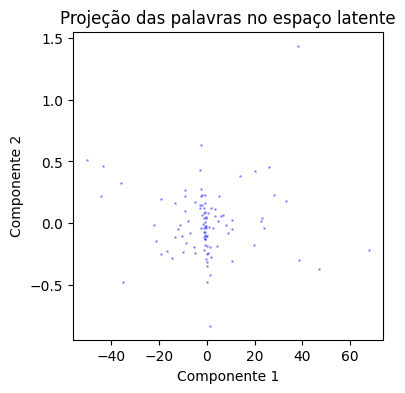

In [76]:
X = vectorizer.fit_transform(list(df['review'])).toarray()
nmf = NMF(n_components=100, init='nndsvda')
X = nmf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def rede_neural_proj(input_dims, n_dims_out):
  input_layer = Input(shape=(input_dims,))
  x = input_layer
  x = Dense(1000, name='projecao')(x)
  y = Dense(n_dims_out, activation='sigmoid', name='classificador')(x)
  return Model(input_layer, y)

rede_neural = rede_neural_proj(X.shape[1], y.shape[1])
rede_neural.compile(optimizer='adam', loss='mse')
plot_model(rede_neural, show_shapes=True, show_layer_activations=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
history = rede_neural.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=es)
y_est = rede_neural.predict(X_test)
print(classification_report(ohe.inverse_transform(y_test), ohe.inverse_transform(y_est)))

v = rede_neural.get_layer('projecao').get_weights()[0]
v.shape
pca = PCA(2)
v = pca.fit_transform(v)

# Visualização 2: onde foi parar cada palavra?
plt.figure(figsize=(4,4))
plt.scatter(v[:,0], v[:,1], s=1, alpha=0.3, c='b')
# for s in ["director", "actor", "bad", "good", "excellent", "plot", "worst", "terrible", "waste", "awful", "fantastic"]:
#     _n = vectorizer.vocabulary_[s]
#     plt.text(v[_n,0], v[_n,1], s, ha='center')
plt.title('Projeção das palavras no espaço latente')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
# plt.xlim([-4,4])
# plt.ylim([-2,2])
plt.show()

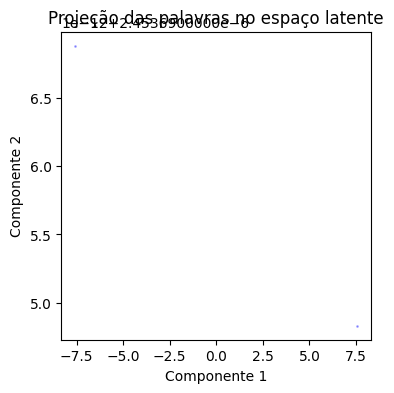

In [75]:
plt.figure(figsize=(4,4))
plt.scatter(v[:,0], v[:,1], s=1, alpha=0.3, c='b')
# for s in ["director", "actor", "bad", "good", "excellent", "plot", "worst", "terrible", "waste", "awful", "fantastic"]:
#     _n = vectorizer.vocabulary_[s]
#     plt.text(v[_n,0], v[_n,1], s, ha='center')
plt.title('Projeção das palavras no espaço latente')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
# plt.xlim([-4,4])
# plt.ylim([-2,2])
plt.show()